In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp

In [2]:
from Module_241021 import (par0,
                           load_data_w_glob,
                           equations_NG_F,
                           equations_NGE_and_F,
                           bifurcation_diagram_of_sampled_data_relchange,
                           plot_bifurcation_diagram_gata_nanog_alpha_kmiNG
                          )

## Bifurcation diagrams

Since plotting the steady state values only at the rel change values I already had, looked too sparce, I run simulations from the same set of ics but from a more fine grained rel change array.

I am interested in the GN and GNE network for paraemter alphaGN and KmiNG

The reference Epi and PrE states are at 
 (Gata6, Nanog)=[ 1.10273171 11.46535802] 
 (Gata6, Nanog)=[13.62042978  2.41356951]

In [3]:
sample_bifur_data = False

if sample_bifur_data:
    
    # 0. load data
    GN_all = load_data_w_glob(directory_path="PSA_data", file_pattern="GN_*csv")
    GNE_all = load_data_w_glob(directory_path="PSA_data", file_pattern="GNE_*csv")
    
    print("Loading is DONE.")
    
    # 1. sample the bifurcation data

    # GN alphaGN
    bifurcation_diagram_of_sampled_data_relchange(df_network=GN_all,
                                                  dim=2,
                                                  model=equations_NG_F,
                                                  date="241021",
                                                  parameter="alphaGN",
                                                  parameter1="wf_G",
                                                  savefile=True
                                                 )
    print("GN DONE")
    
    # GN KmiNG
    bifurcation_diagram_of_sampled_data_relchange(df_network=GN_all,
                                                  dim=2,
                                                  model=equations_NG_F,
                                                  date="241021",
                                                  parameter="KmiNG",
                                                  parameter1="K_GN",
                                                  savefile=True
                                                 )
    
    # GNE alphaGN
    bifurcation_diagram_of_sampled_data_relchange(df_network=GNE_all,
                                                  dim=3,
                                                  model=equations_NGE_and_F,
                                                  date="241021",
                                                  parameter="alphaGN",
                                                  parameter1="wf_G",
                                                  savefile=True
                                                 )

    # GNE KmiNG
    bifurcation_diagram_of_sampled_data_relchange(df_network=GNE_all,
                                                  dim=3,
                                                  model=equations_NGE_and_F,
                                                  date="241021",
                                                  parameter="KmiNG",
                                                  parameter1="K_GN",
                                                  savefile=True
                                                 )
    print("GNE DONE")

In [4]:
# 2. load bifurcation data
GN_alphaNG_df = pd.read_csv("PSA_alphaGN_KmiNG/GN_alphaGN_241021.csv")
GN_kimNG_df = pd.read_csv("PSA_alphaGN_KmiNG/GN_KmiNG_241021.csv")
GNE_alphaNG_df = pd.read_csv("PSA_alphaGN_KmiNG/GNE_alphaGN_241021.csv")
GNE_kimNG_df = pd.read_csv("PSA_alphaGN_KmiNG/GNE_KmiNG_241021.csv")

## Plot the bifurcation diagrams

In [5]:
# 3. plot figures, pdf

plot_figures=False  # check if you want to save the figures, too.

if plot_figures:
    plot_bifurcation_diagram_gata_nanog_alpha_kmiNG(dataframe=GN_alphaNG_df,
                                                    filename_figure="GN_alphaNG",
                                                    date="241015",
                                                    savefig=True
                                                   )

    plot_bifurcation_diagram_gata_nanog_alpha_kmiNG(dataframe=GNE_alphaNG_df,
                                                    filename_figure="GNE_alphaNG",
                                                    date="241015",
                                                    savefig=True
                                                   )

    plot_bifurcation_diagram_gata_nanog_alpha_kmiNG(dataframe=GN_kimNG_df,
                                                    filename_figure="GN_KmiNG",
                                                    date="241015",
                                                    savefig=True
                                                   )

    plot_bifurcation_diagram_gata_nanog_alpha_kmiNG(dataframe=GNE_kimNG_df,
                                                    filename_figure="GNE_KmiNG",
                                                    date="241015",
                                                    savefig=True
                                                   )
    
    
plot_figures=False # pdf=False, makes png files

if plot_figures:
    plot_bifurcation_diagram_gata_nanog_alpha_kmiNG(dataframe=GN_alphaNG_df,
                                                    filename_figure="GN_alphaNG",
                                                    date="241028",
                                                    font_size_axis_title=30,
                                                    savefig=True,pdf=False
                                                   )

    plot_bifurcation_diagram_gata_nanog_alpha_kmiNG(dataframe=GNE_alphaNG_df,
                                                    filename_figure="GNE_alphaNG",
                                                    date="241028",
                                                    font_size_axis_title=30,
                                                    savefig=True,pdf=False
                                                   )

    plot_bifurcation_diagram_gata_nanog_alpha_kmiNG(dataframe=GN_kimNG_df,
                                                    filename_figure="GN_KmiNG",
                                                    date="241028",
                                                    font_size_axis_title=30,
                                                    savefig=True,pdf=False
                                                   )

    plot_bifurcation_diagram_gata_nanog_alpha_kmiNG(dataframe=GNE_kimNG_df,
                                                    filename_figure="GNE_KmiNG",
                                                    date="241028",
                                                    font_size_axis_title=30,
                                                    savefig=True,pdf=False
                                                   )

## Read the bifurcation diagrams

In [6]:
# read the plots
dataframe = GN_alphaNG_df


index=-1

s = dataframe["rel change"].unique()
print(s,"\nscalefactor" ,s[index],"<br>")

mask_gata_pre = dataframe[dataframe["rel change"]==s[index]]["ss gata6"] > 2
mask_gata_epi = dataframe[dataframe["rel change"]==s[index]]["ss gata6"] < 2

mask_nanog_pre = dataframe[dataframe["rel change"]==s[index]]["ss nanog"] < 4
mask_nanog_epi = dataframe[dataframe["rel change"]==s[index]]["ss nanog"] > 4


pre_gata6=np.mean(dataframe[dataframe["rel change"]==s[index]]["ss gata6"][mask_gata_pre])
epi_gata6=np.mean(dataframe[dataframe["rel change"]==s[index]]["ss gata6"][mask_gata_epi])
pre_nanog=np.mean(dataframe[dataframe["rel change"]==s[index]]["ss nanog"][mask_nanog_pre])
epi_nanog=np.mean(dataframe[dataframe["rel change"]==s[index]]["ss nanog"][mask_nanog_epi])


print(f"Epi:{epi_gata6, epi_nanog}, PrE: {pre_gata6, pre_nanog}<br>")

distance = np.sqrt((epi_gata6-pre_gata6)**2+(epi_nanog-pre_nanog)**2)

print(f"Euclidian distance: {distance} <br>")

[0.2        0.2172074  0.23589527 0.25619098 0.27823288 0.3021712
 0.3281691  0.35640378 0.38706769 0.42036983 0.45653718 0.49581626
 0.5384748  0.58480355 0.63511828 0.68976194 0.74910698 0.81355789
 0.88355396 0.95957228 1.04213098 1.13179279 1.22916883 1.33492281
 1.44977555 1.57450986 1.70997595 1.85709712 2.01687616 2.19040211
 2.3788577  2.58352745 2.80580636 3.04720948 3.3093822  3.59411147
 3.90333798 4.23916941 4.60389477 5.        ] 
scalefactor 4.999999999999999 <br>
Epi:(1.001199729145171, 48.18432595338822), PrE: (65.19699925320253, 2.3006232794089474)<br>
Euclidian distance: 78.90763491327755 <br>


In [7]:
# read the plots
dataframe = GN_kimNG_df


index=21#12#28

s = dataframe["rel change"].unique()
print(s,"\nscalefactor" ,s[index],"<br>")

mask_gata_pre = dataframe[dataframe["rel change"]==s[index]]["ss gata6"] > 6
mask_gata_epi = dataframe[dataframe["rel change"]==s[index]]["ss gata6"] < 6

mask_nanog_pre = dataframe[dataframe["rel change"]==s[index]]["ss nanog"] < 6
mask_nanog_epi = dataframe[dataframe["rel change"]==s[index]]["ss nanog"] > 6


pre_gata6=np.mean(dataframe[dataframe["rel change"]==s[index]]["ss gata6"][mask_gata_pre])
epi_gata6=np.mean(dataframe[dataframe["rel change"]==s[index]]["ss gata6"][mask_gata_epi])
pre_nanog=np.mean(dataframe[dataframe["rel change"]==s[index]]["ss nanog"][mask_nanog_pre])
epi_nanog=np.mean(dataframe[dataframe["rel change"]==s[index]]["ss nanog"][mask_nanog_epi])

print(pre_gata6, pre_nanog, epi_gata6, epi_nanog)
print(f"Gata6-to-Nanog ratio, PrE: {pre_gata6/pre_nanog} <br>")
print(f"Gata6-to-Nanog ratio, Epi: {epi_gata6/epi_nanog} <br>")

[0.2        0.2172074  0.23589527 0.25619098 0.27823288 0.3021712
 0.3281691  0.35640378 0.38706769 0.42036983 0.45653718 0.49581626
 0.5384748  0.58480355 0.63511828 0.68976194 0.74910698 0.81355789
 0.88355396 0.95957228 1.04213098 1.13179279 1.22916883 1.33492281
 1.44977555 1.57450986 1.70997595 1.85709712 2.01687616 2.19040211
 2.3788577  2.58352745 2.80580636 3.04720948 3.3093822  3.59411147
 3.90333798 4.23916941 4.60389477 5.        ] 
scalefactor 1.1317927911527863 <br>
14.053513438531335 2.464771457807097 1.2002874431606578 11.46974399830151
Gata6-to-Nanog ratio, PrE: 5.701751127479674 <br>
Gata6-to-Nanog ratio, Epi: 0.10464814588175653 <br>


**GN, alpha**<br>
scalefactor 1.1317927911527863 <br>
Epi:(1.0917014820939444, 11.852849815729867), PrE: (14.179862776078465, 2.400740462996709)<br>
Euclidian distance: 16.14442124306041 <br>

scalefactor 4.999999999999999 <br>
Epi:(1.001199729145171, 48.18432595338822), PrE: (65.19699925320253, 2.3006232794089474)<br>
Euclidian distance: 78.90763491327755 <br>

**GN kmiNG**<br>
scalefactor 0.5384747991560215 <br>
Epi:(1.0074800380476947, 11.262800307402934), PrE: (6.91877888498833, 2.4443277647150916)<br>
Euclidian distance: 10.616445358215767 <br>

Gata6-to-Nanog ratio, PrE: 2.830544653161429 <br>
Gata6-to-Nanog ratio, Epi: 0.08945200221524725 <br>

scalefactor 2.0168761605950327 <br>
Epi:(4.644281173194556, 10.978754236055929), PrE: (14.53106470808778, 3.6487799076487937)<br>
Euclidian distance: 12.307599779036664 <br>
Gata6-to-Nanog ratio, PrE: 3.9824448379653923 <br>
Gata6-to-Nanog ratio, Epi: 0.4230244227475297 <br>


## Why does the parameters that are only evaluated in the GNE network not influence the robustness of the models?
### Why does K_EG not affect the robustness conditions?

In [3]:
def sample_trajectories_till_steady_state(model, tmax, ic, parameters):
    
    
    sol = solve_ivp(model,(0,tmax), ic, args=[parameters])
        
    def find_time_ss(sol):
        #trajectory = []
        timepoints = []
        
        count = 0
        dcount = 5
        slope = 10 # some high number
        ss_threshold = 0.01 # convergence

        # note: in case ss isn't reached within tmax, the time condition is added.
        while sol.t[count] < sol.t[-1] and slope > ss_threshold:
            if count-dcount > 0: # ensure that the previous element exists
                # I measure the relative change in Nanog and Gata6 levels between time point i-5 and i.
                # I use the max relative change as a condition.
                slope = np.max((sol.y[:2, count]-sol.y[:2, count-dcount])/sol.y[:2, count-dcount])
            count += 1
            timepoints.append(sol.t[count])
            
        return count, timepoints#count-1, sol.t[count]
        
    count_ss, timepoints = find_time_ss(sol)
    
    return sol.y[:,0:count_ss], timepoints

In [6]:
y, t = sample_trajectories_till_steady_state(equations_NG_F, tmax=100, ic=[0.1, 0.1], parameters=par0)



y

array([[ 0.1       ,  0.14995209,  0.41183794,  0.67881486,  1.2627647 ,
         1.83096138,  1.92501752,  1.69481476,  1.41510846,  1.22539889,
         1.13782095,  1.11075466,  1.10437062,  1.10327056,  1.10209622,
         1.10260062],
       [ 0.1       ,  0.22198179,  0.97307341,  2.71382372,  4.7071399 ,
         6.40102221,  8.6110312 ,  9.92312167, 10.84704484, 11.28338574,
        11.42711213, 11.45988398, 11.46594143, 11.46637839, 11.45719336,
        11.46379271]])

In [9]:
# return primed PrE ICs and primed Epi ICs
ic_nanog = GNE_alphaNG_df["ic nanog"].unique()
ic_gata6 = GNE_alphaNG_df["ic gata6"].unique()
ic_esrrb = GN_alphaNG_df["ic essrb"].unique()


# primed PrE IC
pre_nanog=ic_nanog[0]
pre_gata6=ic_gata6[15]
pre_mask = (GNE_alphaNG_df["ic gata6"]==pre_gata6)&(GNE_alphaNG_df["ic nanog"]==pre_nanog)
pre_esrrb=GNE_alphaNG_df[pre_mask]["ic essrb"].unique()[0]

primed_pre = [pre_gata6,pre_nanog,pre_esrrb]
print("primed PrE =", primed_pre)


# primed Epi IC
epi_nanog=ic_nanog[15]
epi_gata6=ic_gata6[0]
epi_mask = (GNE_alphaNG_df["ic gata6"]==epi_gata6)&(GNE_alphaNG_df["ic nanog"]==epi_nanog)
epi_esrrb=GNE_alphaNG_df[epi_mask]["ic essrb"].unique()[0]

primed_epi= [epi_gata6,epi_nanog,epi_esrrb]
print("primed Epi =", primed_epi)

primed PrE = [0.5347244000266966, 0.1, 0.994171714880008]
primed Epi = [0.1, 0.5347244000266966, 1.4459710015535236]


In [10]:
par0

{'basal_N': 3.5,
 'basal_G': 1,
 'basal_E': 1,
 'wf_G': 14,
 'wf_N': 14,
 'wf_E': 12,
 'tau_G': 1,
 'tau_N': 1,
 'tau_E': 1,
 'K_GG': 1.2,
 'K_NN': 1.2,
 'K_GN': 4.2,
 'K_NG': 4.2,
 'K_FN': 1,
 'K_FE': 3,
 'K_EN': 1.2,
 'K_NE': 1.2,
 'K_NEG': 1.2,
 'K_EG': 1.2,
 'h': 4,
 'FGF': 0.85}

In [11]:
def plot_trajectories_till_steady_state(model, tmax, ic, parameters, title, date,
                                        font_size=20,font_size_legend=15,ymax=18,
                                        add_legend=True,savefig=False):
    
    def annotate_axhline(text, y, ax, x=np.log2(0.12)):
        """
        text: str, annotation text
        x, y: float, position of the annotation
        ax: specify ax (the subplot)
        """
    
        ax.annotate(f"{text}", xy=(0.5, y), xycoords='data', 
                    fontsize=10, color="gray", 
                    xytext=(x, y),  # Position on top of the line
                    textcoords='data',  # Keep the x-coordinate in data coordinates
                    verticalalignment='center',
                    horizontalalignment='center',
                    bbox=dict(facecolor='white', edgecolor='none', pad=2.0))  # White background box
    
    # 0. create figure
    fig, ax = plt.subplots(figsize=(4,6))
    
    # 1. sample data
    pos, time = sample_trajectories_till_steady_state(model=model, tmax=tmax, ic=ic, parameters=parameters)
    
    # 2. plot data
    ax.plot(time, np.log2(pos[0]), color="red",label="[GATA6]", alpha=1)
    ax.plot(time, np.log2(pos[1]), color="green",label="[NANOG]", alpha=1)
    ax.plot(time, np.log2(pos[2]), color="blue",label="[ESRRB]", alpha=1)
    
    
    
    # 2.1 plot Epi reference
    ax.axhline(y=np.log2(1.10273171),color="gray", linestyle="--", label="Epi")  # gata6
    ax.axhline(y=np.log2(11.46535802), color="gray", linestyle="--") # nanog

    # 2.2 plot PrE refernce
    ax.axhline(y=np.log2(13.62042978), color="gray", linestyle=":", label="PrE") # gata6
    ax.axhline(y=np.log2(2.41356951),color="gray", linestyle=":") # nanog

    # 2.3 add annotations
    for text_i, y_i in zip(["GATA6", "NANOG", "GATA6 ", "NANOG"],
                           [1.10273171,11.46535802,13.62042978,2.41356951]):
        annotate_axhline(text=text_i,y=np.log2(y_i), ax=ax)
        
    # 3. add title, axis labels, legends
    ax.set_title(f"{title}", fontsize=font_size)
    ax.set_xlabel("Time", fontsize=font_size)
    ax.set_ylabel("Protein level", fontsize=font_size)
    if add_legend:
        ax.legend(fontsize=font_size_legend)
    
    
    # 4. costumise ticks
    ytick_labels = [0.025*ymax, 0.05*ymax, 0.1*ymax,0.25*ymax, 0.5*ymax, ymax]
    ytick = ax.set_yticks(ticks=np.log2(ytick_labels), labels=ytick_labels)
    
    # 5. Adjust figure
    ax.set_xlim(-8,max(time))
    plt.tight_layout()
    
    if savefig:
        plt.savefig(f"esrrb_steady_state_{par0['K_EG']}_{title}_{date}.pdf", dpi=600)

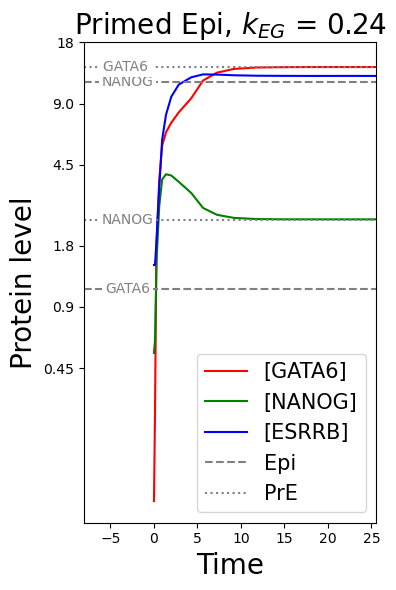

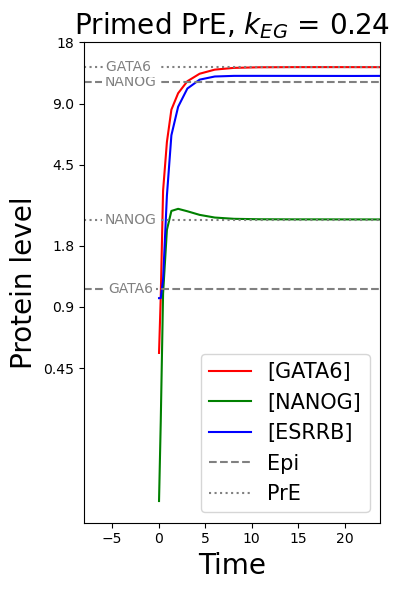

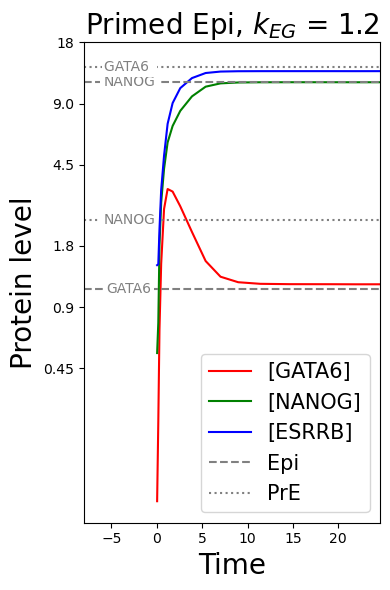

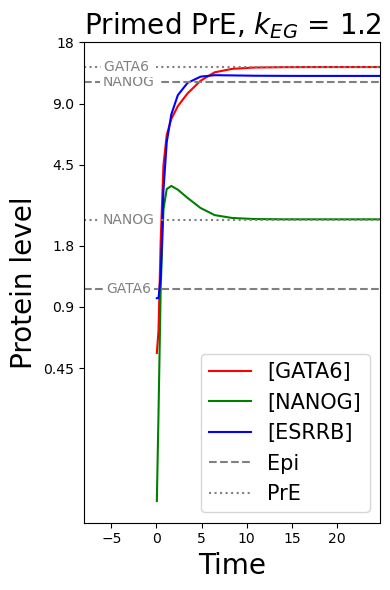

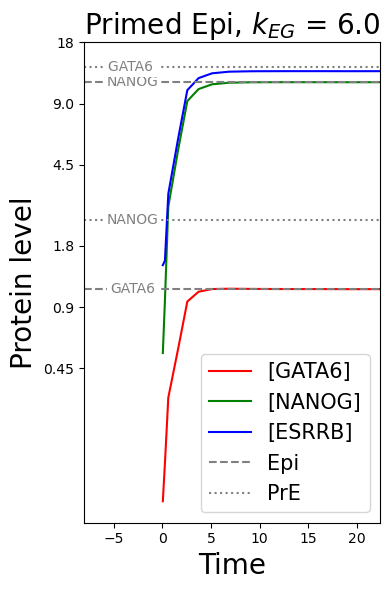

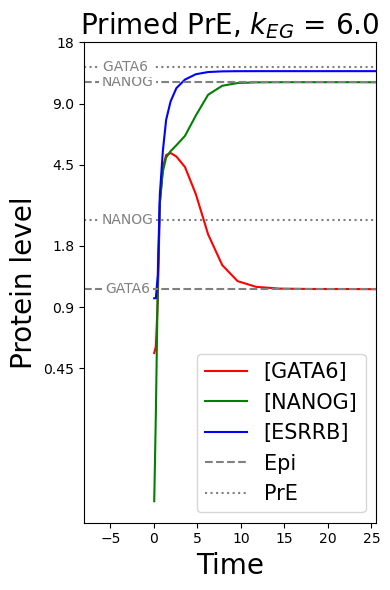

In [12]:
par0["K_EG"]=0.2*1.2

plot_trajectories_till_steady_state(model=equations_NGE_and_F, tmax=100, ic=primed_epi,
                                    parameters=par0,title=r"Primed Epi, $k_{EG}$ = 0.24", date="241029",
                                    savefig=True)

plot_trajectories_till_steady_state(model=equations_NGE_and_F, tmax=100, ic=primed_pre,
                                    parameters=par0,title=r"Primed PrE, $k_{EG}$ = 0.24", date="241029",
                                    savefig=True)


par0["K_EG"]=1*1.2

plot_trajectories_till_steady_state(model=equations_NGE_and_F, tmax=100, ic=primed_epi,
                                    parameters=par0,title=r"Primed Epi, $k_{EG}$ = 1.2", date="241029",
                                    savefig=True)

plot_trajectories_till_steady_state(model=equations_NGE_and_F, tmax=100, ic=primed_pre,
                                    parameters=par0,title=r"Primed PrE, $k_{EG}$ = 1.2", date="241029",
                                    savefig=True)


par0["K_EG"]=5.0*1.2

plot_trajectories_till_steady_state(model=equations_NGE_and_F, tmax=100, ic=primed_epi,
                                    parameters=par0,title=r"Primed Epi, $k_{EG}$ = 6.0", date="241029",
                                    savefig=True)

plot_trajectories_till_steady_state(model=equations_NGE_and_F, tmax=100, ic=primed_pre,
                                    parameters=par0,title=r"Primed PrE, $k_{EG}$ = 6.0", date="241029",
                                    savefig=True)
